In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from time_contracts import *
from itertools import product
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
%%timeit
G_c, W_c = time_var_contracts(my_print=False)

591 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit
G_t, W_t = time_var_contracts_tract(my_print=False)

251 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
G_c, W_c = time_var_contracts(my_print=False)
G_t, W_t = time_var_contracts_tract(my_print=False)

err_rel_g = np.linalg.norm(G_c - G_t) / np.linalg.norm(G_c)
err_rel_w = np.linalg.norm(W_c - W_t) / np.linalg.norm(W_c)

print("G_c = ", G_c)
print("G_t = ", G_t)
print("Relative error = ", err_rel_g)
print()
print("W_c = ", W_c)
print("W_t = ", W_t)
print("Relative error = ", err_rel_w)

G_c =  [[0.1        0.2        0.3        0.4        0.5       ]
 [0.15000067 0.24999916 0.34999865 0.44999923 0.54999955]
 [0.16390012 0.26666609 0.36666603 0.46666589 0.56666586]
 [0.16390013 0.29166705 0.39166576 0.4916656  0.59166549]
 [0.16390013 0.30056661 0.42751612 0.54166298 0.64166248]]
G_t =  [[0.5        1.         1.5        2.         2.5       ]
 [0.54998547 1.0501201  1.55002517 2.04998917 2.54998726]
 [0.5638969  1.06667111 1.56665519 2.06666517 2.56666682]
 [0.56389703 1.09164447 1.59163302 2.09162545 2.59164514]
 [0.56389704 1.10057192 1.62750575 2.14167398 2.64170858]]
Relative error =  3.3605819867918387

W_c =  [[-0.         -0.         -0.         -0.         -0.        ]
 [ 4.00005338  3.99993254  3.99989208  3.99993831  3.9999637 ]
 [ 5.38999841  5.66662582  5.6666299   5.66660475  5.66659459]
 [ 5.38999987  9.00008723  8.9999275   8.9998994   8.99987985]
 [ 5.38999999 10.77999994 16.16999974 18.99937426 18.9992768 ]]
W_t =  [[-0.         -0.         -0.       

In [5]:
G_tl, W_tl = time_var_contracts_typelax(my_print=False)
print("G_tl = ", G_tl)
print("W_tl = ", W_tl)


G_tl =  [[0.75       0.75       0.75       0.75       0.75      ]
 [0.80000148 0.80000151 0.80000152 0.80000153 0.80000154]
 [0.81389917 0.8138992  0.81389921 0.81389923 0.81389924]
 [0.81389999 0.81390002 0.81390003 0.81390003 0.81390004]
 [0.81390004 0.84085003 0.86779998 0.88190484 0.88200227]]
W_tl =  [[-0.         -0.         -0.         -0.         -0.        ]
 [ 4.00011849  4.00012032  4.00012143  4.00012233  4.00012327]
 [ 5.38988534  5.3898885   5.38989025  5.38989162  5.38989301]
 [ 5.38999258  5.38999598  5.3899973   5.38999824  5.38999916]
 [ 5.38999972 10.77999672 16.16998716 18.99095937 19.01044439]]


  0%|          | 0/2304 [00:00<?, ?it/s]

Mean absolute error in G =  2.361706419801484
Mean absolute error in W =  16.221442150276296
Mean relative error in G =  5.557350407494296
Mean relative error in W =  20462336356.114754


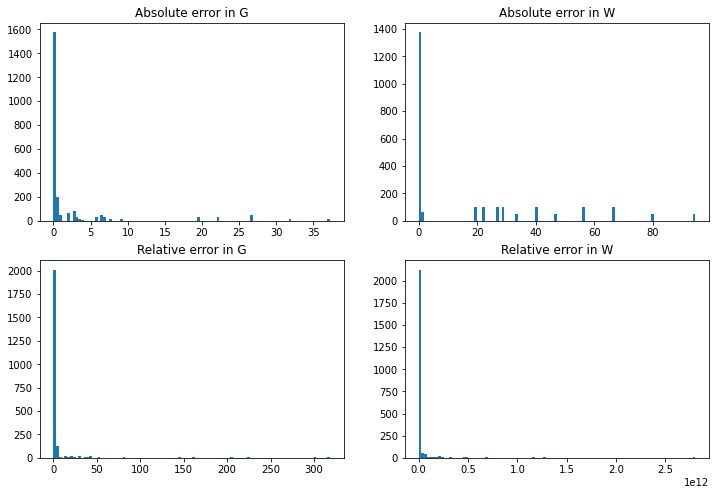

In [12]:
if True:
    l_c1 = [0.01, 0.1, 1, 10]
    l_c2 = [0.01, 0.1, 1, 10]
    l_kappa1 = [0.01, 0.1, 1, 10]
    l_kappa2 = [0.01, 0.1, 1, 10]
    l_thetas = [[1.5, 1.25, 1, 0.75, 0.5],
                 [1.25, 1, 0.75], [2, 1, 0.5]]
    l_laxes = [[1,2,3,4,5], [1,2,3], [4,5,6]]

    l_err_abs_g = []
    l_err_abs_w = []
    l_err_rel_g = []
    l_err_rel_w = []

    args = product(l_c1, l_c2, l_kappa1, l_kappa2, l_thetas, l_laxes)
    total_args = len(l_c1) * len(l_c2) * len(l_kappa1) * len(l_kappa2) * len(l_thetas) * len(l_laxes)   
    for arg in tqdm(args, total=total_args):
        c1, c2, kappa1, kappa2, thetas, laxes = arg
        G_c, W_c = time_var_contracts(my_print=False, c1=c1, c2=c2, kappa1=kappa1, kappa2=kappa2, thetas=thetas, laxes=laxes)
        G_t, W_t = time_var_contracts_tract(my_print=False, c1=c1, c2=c2, kappa1=kappa1, kappa2=kappa2, thetas=thetas, laxes=laxes)
        err_rel_g = np.linalg.norm(G_c - G_t) / np.linalg.norm(G_c)
        err_rel_w = np.linalg.norm(W_c - W_t) / np.linalg.norm(W_c)
        l_err_abs_g.append(np.linalg.norm(G_c - G_t))
        l_err_abs_w.append(np.linalg.norm(W_c - W_t))
        l_err_rel_g.append(err_rel_g)
        l_err_rel_w.append(err_rel_w)


    fig1 = plt.figure(figsize=(12, 8))
    ax1 = fig1.add_subplot(2,2,1)
    ax2 = fig1.add_subplot(2,2,2)
    ax3 = fig1.add_subplot(2,2,3)
    ax4 = fig1.add_subplot(2,2,4)

    ax1.hist(l_err_abs_g, bins=100)
    ax1.set_title("Absolute error in G")
    ax2.hist(l_err_abs_w, bins=100)
    ax2.set_title("Absolute error in W")
    ax3.hist(l_err_rel_g, bins=100)
    ax3.set_title("Relative error in G")
    ax4.hist(l_err_rel_w, bins=100)
    ax4.set_title("Relative error in W")

    print("Mean absolute error in G = ", np.mean(l_err_abs_g))
    print("Mean absolute error in W = ", np.mean(l_err_abs_w))
    print("Mean relative error in G = ", np.mean(l_err_rel_g))
    print("Mean relative error in W = ", np.mean(l_err_rel_w))

In [13]:
psi = 0.49
alpha_d = 11 
laxes = [1,2,3,4,5]

G_s, W_s = time_var_contracts(laxes = laxes, c1=0.01, c2=0.5, kappa2 = 0, my_print=False, u_vpp="sep")
G_2, W_2 = time_var_contracts(laxes = laxes, c1=0.01, c2=0.5, kappa2 = 1000, my_print=False, u_vpp="sep", lax_ic_const = True)

print(np.max(G_s-G_2))
print(np.max(W_s-W_2))
print(G_s)
print(W_s)

0.0
0.0
[[0.5        1.         1.5        2.         2.5       ]
 [0.55000359 1.04999913 1.54999906 2.04999912 2.54999899]
 [0.56390071 1.06666581 1.56666646 2.06666679 2.56666725]
 [0.56390072 1.09166601 1.5916657  2.09166628 2.59166715]
 [0.56390072 1.10056622 1.62751622 2.14166557 2.64166734]]
[[-0.         -0.         -0.         -0.         -0.        ]
 [ 4.00028685  3.99993061  3.99992517  3.99992929  3.99991894]
 [ 5.38999941  5.66659816  5.66666495  5.66669695  5.66674575]
 [ 5.38999993  8.99995865  8.99989619  8.99996165  9.00006522]
 [ 5.38999999 10.77999997 16.16999988 18.9998204  19.00010376]]


In [14]:
G_tract, W_tract = time_var_contracts_tract(my_print=True, c2=0.1)

#print(np.max(G_s-G_tract))
#print(np.max(W_s-W_tract))

print(G_tract)
print(W_tract)

thetas=[0.6666666666666666, 0.8, 1.0, 1.3333333333333333, 2.0]
laxes=[1, 2, 3, 4, 5]
PI=array([0.2, 0.2, 0.2, 0.2, 0.2])
Maximize over G, W
 PI[0]*(kappa1 * cp.log(W[0]+1)- G[0])
 PI[1]*(kappa1 * cp.log(W[1]+1)- G[1])
 PI[2]*(kappa1 * cp.log(W[2]+1)- G[2])
 PI[3]*(kappa1 * cp.log(W[3]+1)- G[3])
 PI[4]*(kappa1 * cp.log(W[4]+1)- G[4])

Individual rationality 0
G[0] - c1 * thetas[0] * W[0] - c2 * lax == 0

Binding incentive constraints
G[1] - c1 * thetas[1] * W[1] - c2 * 1 == G[0] - c1 * thetas[1] * W[0] - c2 * 1
G[2] - c1 * thetas[2] * W[2] - c2 * 1 == G[1] - c1 * thetas[2] * W[1] - c2 * 1
G[3] - c1 * thetas[3] * W[3] - c2 * 1 == G[2] - c1 * thetas[3] * W[2] - c2 * 1
G[4] - c1 * thetas[4] * W[4] - c2 * 1 == G[3] - c1 * thetas[4] * W[3] - c2 * 1

Energy ordering
0 == W[0]
W[0] <= W[1]
W[1] <= W[2]
W[2] <= W[3]
W[3] <= W[4]
W[4] <= 1 * psi * alpha_d
G
[0.1        0.14999774 0.16389953 0.16389954 0.16389954]

W
[-0.          3.99981892  5.38999788  5.38999974  5.38999996]
-------

PI=array(

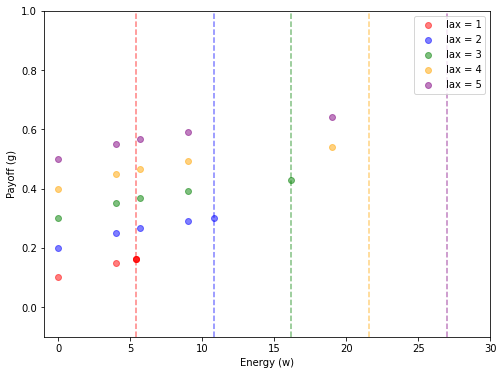

In [15]:
G, W = time_var_contracts(my_print=False)
laxes = [1,2,3,4,5]
fig1 = plt.figure(figsize = (8, 6))
ax1 = fig1.add_subplot(1,1,1)
colors = ["red", "blue", "green", "orange", "purple"]
ax1.set_ylabel("Payoff (g)")
for i in range(len(laxes)):
    ax1.scatter(W[:,i],G[:,i], alpha = 0.5, color=colors[i], label = f"lax = {laxes[i]}")
    ax1.vlines(laxes[i]*alpha_d*psi, -0.1, 1, color=colors[i], ls = "--", alpha=0.5)
ax1.set_xlim([-1, 30]) 
ax1.set_ylim([-0.1, 1])
ax1.set_xlabel("Energy (w)")
ax1.legend()

G_tl =  [[0.75       0.75       0.75       0.75       0.75      ]
 [0.80000148 0.80000151 0.80000152 0.80000153 0.80000154]
 [0.81389917 0.8138992  0.81389921 0.81389923 0.81389924]
 [0.81389999 0.81390002 0.81390003 0.81390003 0.81390004]
 [0.81390004 0.84085003 0.86779998 0.88190484 0.88200227]]
W_tl =  [[-0.         -0.         -0.         -0.         -0.        ]
 [ 4.00011849  4.00012032  4.00012143  4.00012233  4.00012327]
 [ 5.38988534  5.3898885   5.38989025  5.38989162  5.38989301]
 [ 5.38999258  5.38999598  5.3899973   5.38999824  5.38999916]
 [ 5.38999972 10.77999672 16.16998716 18.99095937 19.01044439]]


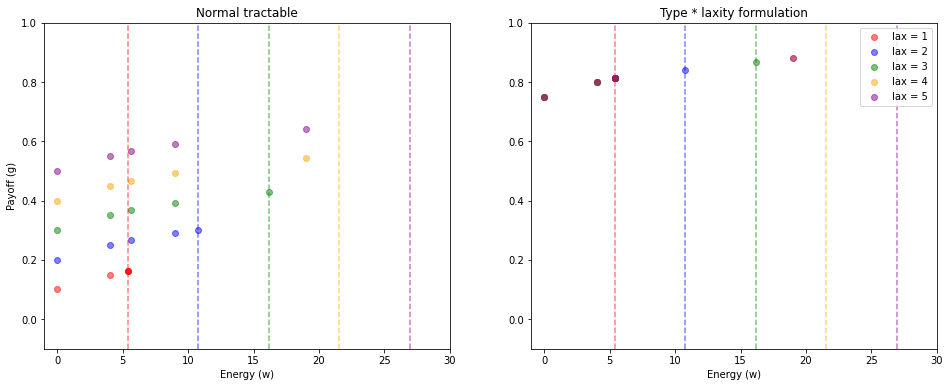

In [16]:
G_tl, W_tl = time_var_contracts_typelax(my_print=False, c2=0.1)
print("G_tl = ", G_tl)
print("W_tl = ", W_tl)

G1 = G_tract
W1 = W_tract

G2 = G_tl
W2 = W_tl
laxes = [1,2,3,4,5]
fig1 = plt.figure(figsize = (16, 6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
colors = ["red", "blue", "green", "orange", "purple"]
ax1.set_ylabel("Payoff (g)")
for i in range(len(laxes)):
    ax1.scatter(W1[:,i],G1[:,i], alpha = 0.5, color=colors[i], label = f"lax = {laxes[i]}")
    ax1.vlines(laxes[i]*alpha_d*psi, -0.1, 1, color=colors[i], ls = "--", alpha=0.5)
    ax2.scatter(W2[:,i],G2[:,i], alpha = 0.5, color=colors[i], label = f"lax = {laxes[i]}")
    ax2.vlines(laxes[i]*alpha_d*psi, -0.1, 5, color=colors[i], ls = "--", alpha=0.5)
ax1.set_xlim([-1, 30]) 
ax1.set_ylim([-0.1, 1])
ax1.set_title("Normal tractable")
ax2.set_xlim([-1, 30]) 
ax2.set_ylim([-0.1, 1])
ax1.set_xlabel("Energy (w)")
ax2.set_xlabel("Energy (w)")
ax2.set_title("Type * laxity formulation")
ax2.legend()

## Sensitivity

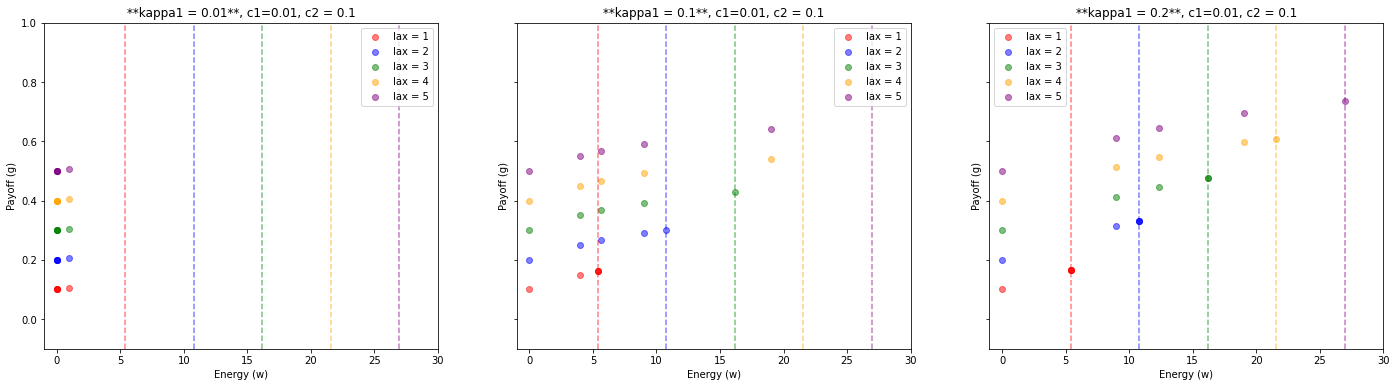

In [17]:
# Sensitivity kappa1
kappa1_s = [0.01, 0.1, 0.2]
Gs = []
Ws = []
for kappa1 in kappa1_s:
    G_i, W_i = time_var_contracts(my_print=False, kappa1=kappa1, c2=0.1)
    Gs.append(G_i)
    Ws.append(W_i)

colors = ["red", "blue", "green", "orange", "purple"]
fig1 = plt.figure(figsize = (24, 6))
axs = fig1.subplots(1,3, sharey=True)
for i in range(3):
    for j in range(len(laxes)):
        axs[i].scatter(Ws[i][:,j],Gs[i][:,j], alpha = 0.5, color=colors[j], label = f"lax = {laxes[j]}")
        axs[i].vlines(laxes[j]*alpha_d*psi, -0.1, 1, color=colors[j], ls = "--", alpha=0.5)
    axs[i].set_xlim([-1, 30])
    axs[i].set_ylim([-0.1, 1])
    axs[i].set_xlabel("Energy (w)")
    axs[i].set_ylabel("Payoff (g)")
    axs[i].set_title(f"**kappa1 = {kappa1_s[i]}**, c1=0.01, c2 = 0.1")
    axs[i].legend()

Text(0.5, 0.98, 'Kappa2 does not affect the solution')

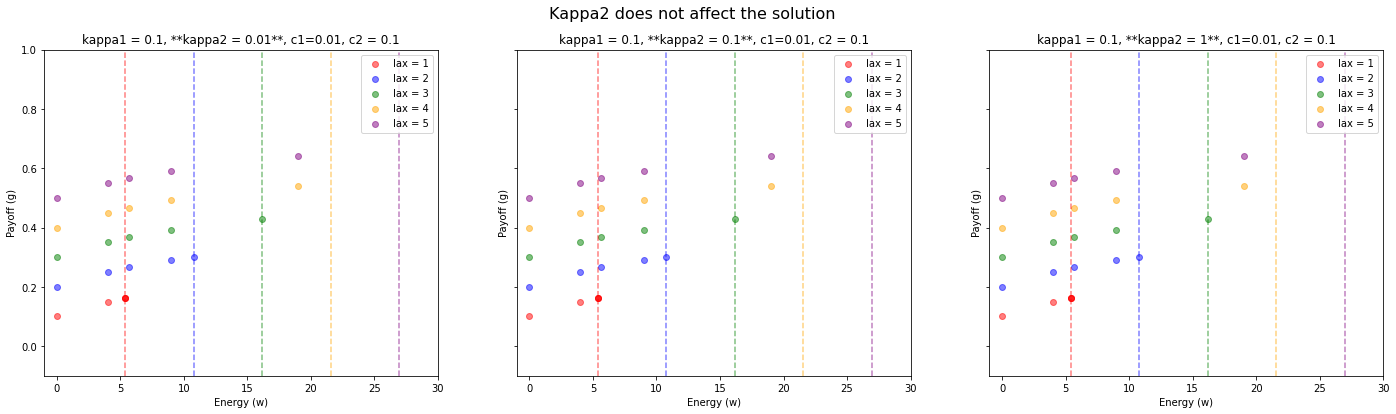

In [18]:
# Sensitivity kappa2
kappa2_s = [0.01, 0.1, 1]
Gs = []
Ws = []
for kappa2 in kappa2_s:
    G_i, W_i = time_var_contracts(my_print=False, kappa2=kappa2, c2=0.1)
    Gs.append(G_i)
    Ws.append(W_i)

colors = ["red", "blue", "green", "orange", "purple"]
fig1 = plt.figure(figsize = (24, 6))
axs = fig1.subplots(1,3, sharey=True)
for i in range(3):
    for j in range(len(laxes)):
        axs[i].scatter(Ws[i][:,j],Gs[i][:,j], alpha = 0.5, color=colors[j], label = f"lax = {laxes[j]}")
        axs[i].vlines(laxes[j]*alpha_d*psi, -0.1, 1, color=colors[j], ls = "--", alpha=0.5)
    axs[i].set_xlim([-1, 30])
    axs[i].set_ylim([-0.1, 1])
    axs[i].set_xlabel("Energy (w)")
    axs[i].set_ylabel("Payoff (g)")
    axs[i].set_title(f"kappa1 = 0.1, **kappa2 = {kappa2_s[i]}**, c1=0.01, c2 = 0.1")
    axs[i].legend()
# figure title
fig1.suptitle("Kappa2 does not affect the solution", fontsize=16)

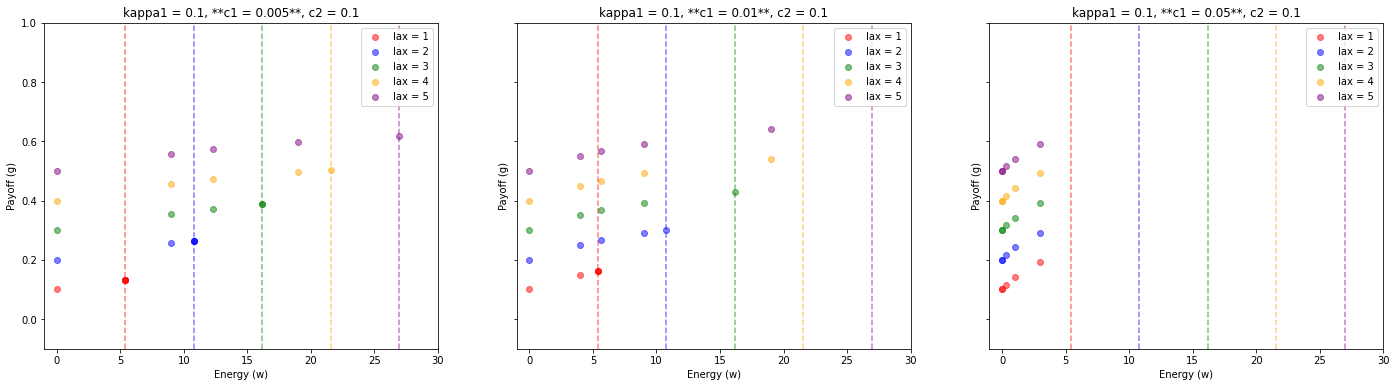

In [19]:
# Sensitivity c1
c1_s = [0.005, 0.01, 0.05]
Gs = []
Ws = []
for c1 in c1_s:
    G_i, W_i = time_var_contracts(my_print=False, c1 = c1, c2=0.1)
    Gs.append(G_i)
    Ws.append(W_i)

colors = ["red", "blue", "green", "orange", "purple"]
fig1 = plt.figure(figsize = (24, 6))
axs = fig1.subplots(1,3, sharey=True)
for i in range(3):
    for j in range(len(laxes)):
        axs[i].scatter(Ws[i][:,j],Gs[i][:,j], alpha = 0.5, color=colors[j], label = f"lax = {laxes[j]}")
        axs[i].vlines(laxes[j]*alpha_d*psi, -0.1, 1, color=colors[j], ls = "--", alpha=0.5)
    axs[i].set_xlim([-1, 30])
    axs[i].set_ylim([-0.1, 1])
    axs[i].set_xlabel("Energy (w)")
    axs[i].set_ylabel("Payoff (g)")
    axs[i].set_title(f"kappa1 = 0.1, **c1 = {c1_s[i]}**, c2 = 0.1")
    axs[i].legend()

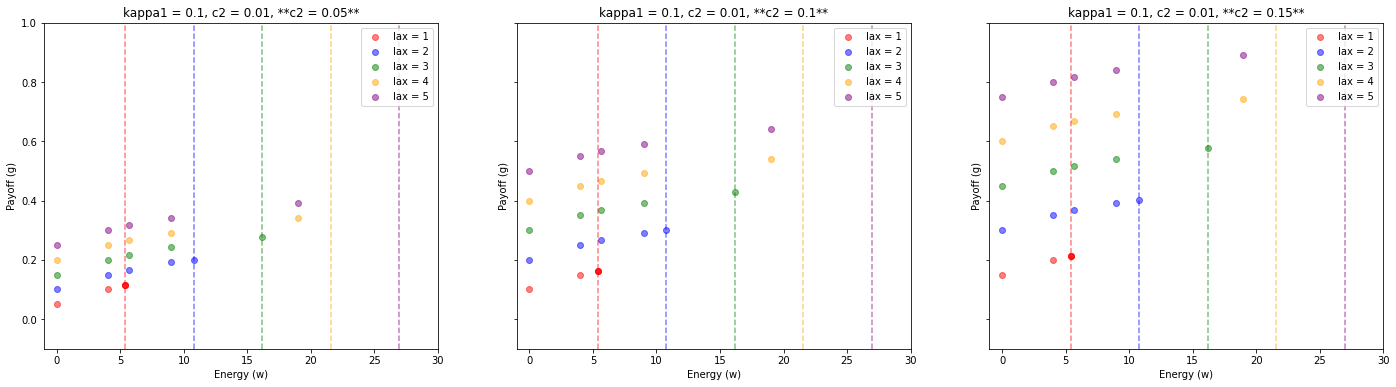

In [20]:
# Sensitivity c2
c2_s = [0.05, 0.1, 0.15]
Gs = []
Ws = []
for c2 in c2_s:
    G_i, W_i = time_var_contracts(my_print=False, c2=c2)
    Gs.append(G_i)
    Ws.append(W_i)

colors = ["red", "blue", "green", "orange", "purple"]
fig1 = plt.figure(figsize = (24, 6))
axs = fig1.subplots(1,3, sharey=True)
for i in range(3):
    for j in range(len(laxes)):
        axs[i].scatter(Ws[i][:,j],Gs[i][:,j], alpha = 0.5, color=colors[j], label = f"lax = {laxes[j]}")
        axs[i].vlines(laxes[j]*alpha_d*psi, -0.1, 1, color=colors[j], ls = "--", alpha=0.5)
    axs[i].set_xlim([-1, 30])
    axs[i].set_ylim([-0.1, 1])
    axs[i].set_xlabel("Energy (w)")
    axs[i].set_ylabel("Payoff (g)")
    axs[i].set_title(f"kappa1 = 0.1, c2 = 0.01, **c2 = {c2_s[i]}**")
    axs[i].legend()

In [21]:
A = [] 
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
A = [a,b,c]
print(type(A))
print(type(np.array(A)))
print(np.array(A).shape)
np.array(A).T

<class 'list'>
<class 'numpy.ndarray'>
(3, 3)


array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

## Example for scalable RL

In [53]:
n_cars = 10
t_rem = np.floor(np.random.uniform(1, 7, n_cars))
E_rem = np.random.uniform(1, 90, n_cars)
W_avail = np.random.uniform(1, 30, n_cars)

t_rem_q = np.minimum(np.floor((t_rem+1)/ 2)*2, 6)
E_rem_q = np.minimum(np.floor((E_rem+29)/ 30)*30, 60)
W_avail_q = np.minimum(np.floor((W_avail+9)/ 10)*10, 20)

columns = ["t_rem", "E_rem", "W_avail"]
df_org = pd.DataFrame(data= np.array([t_rem, E_rem, W_avail]).T, columns=columns)
df_quant = pd.DataFrame(data= np.array([t_rem_q, E_rem_q, W_avail_q]).T, columns=columns)

display(df_org.head(10))
display(df_quant.head(10))

bins_t_rem = np.arange(2,7,2)
bins_E_rem = np.arange(30,81,30)
bins_W_avail = np.arange(10,21,10)
len_options = len(bins_t_rem)*len(bins_E_rem)*len(bins_W_avail)
print(f"Bins t_rem: {bins_t_rem}, Bins E_rem: {bins_E_rem}, Bins W_avail: {bins_W_avail}")
# Length
print(f"Bins t_rem: {len(bins_t_rem)}, Bins E_rem: {len(bins_E_rem)}, Bins W_avail: {len(bins_W_avail)}")
print(f"Total number of options: {len_options}")
counts = np.zeros(len_options)

options = product(bins_t_rem, bins_E_rem, bins_W_avail)
t_rem_track = []
E_rem_track = []
W_avail_track = []
for i, option in enumerate(options):
    t_rem_i, E_rem_i, W_avail_i = option
    t_rem_track.append(t_rem_i)
    E_rem_track.append(E_rem_i)
    W_avail_track.append(W_avail_i)

    count = df_quant[(df_quant["t_rem"] == t_rem_i) & (df_quant["E_rem"] == E_rem_i) & (df_quant["W_avail"] == W_avail_i)].shape[0]
    counts[i] = count
norm_counts = counts/n_cars

df_counts = pd.DataFrame(data= np.array([t_rem_track, E_rem_track, W_avail_track, counts, norm_counts]).T, columns=["t_rem", "E_rem", "W_avail", "counts", "norm_counts"])
display(df_counts.head(24))

,t_rem,E_rem,W_avail
0,2.0,78.182198,26.369368
1,3.0,35.082985,23.807481
2,1.0,72.802389,15.140812
3,2.0,57.504194,9.414268
4,1.0,52.311730,18.106734
5,6.0,12.126585,11.957542
6,4.0,72.030623,8.869108
7,6.0,40.108661,11.802700
8,1.0,79.395668,25.446840
9,5.0,74.106610,28.244693


,t_rem,E_rem,W_avail
0,2.0,60.0,20.0
1,4.0,60.0,20.0
2,2.0,60.0,20.0
3,2.0,60.0,10.0
4,2.0,60.0,20.0
5,6.0,30.0,20.0
6,4.0,60.0,10.0
7,6.0,60.0,20.0
8,2.0,60.0,20.0
9,6.0,60.0,20.0


Bins t_rem: [2 4 6], Bins E_rem: [30 60], Bins W_avail: [10 20]
Bins t_rem: 3, Bins E_rem: 2, Bins W_avail: 2
Total number of options: 12


,t_rem,E_rem,W_avail,counts,norm_counts
0,2.0,30.0,10.0,0.0,0.0
1,2.0,30.0,20.0,0.0,0.0
2,2.0,60.0,10.0,1.0,0.1
3,2.0,60.0,20.0,4.0,0.4
4,4.0,30.0,10.0,0.0,0.0
5,4.0,30.0,20.0,0.0,0.0
6,4.0,60.0,10.0,1.0,0.1
7,4.0,60.0,20.0,1.0,0.1
8,6.0,30.0,10.0,0.0,0.0
9,6.0,30.0,20.0,1.0,0.1
